#  **Carbon emissions predictor for vehicles**


## Presentation of context and interest in case:

As it has been known for years, cars have been one of the numerous sources of gas emissions that contributes to worsen the quality of the air and also increases the greenhouse effect that has been changing the climate of the planet for decades. According to WHO estimates, the continuous emission of gases to the atmosphere causes 7 million deaths every year, caused by respiratory diseases directly related to this pollution or poor air quality.


In addition, the effects of climate change are already being noticed today, such as more durable droughts and restrictions on water supply, increased heat waves in summer, increased risk of fires due to high temperatures and dryness conditions, rising sea levels, melting of glaciers, increased frequency and power of hurricanes or cyclones in the Gulf of Mexico, west of the Atlantic, caused by the rise in ocean temperatures, acidification of them by a greater absorption of these emissions. The latter consequence mentioned can be a risk to the population of microorganisms such as phytoplankton, the main source of oxygen production on Earth and absorption of CO$_2$ through photosynthesis (remember that 2/3 parts of the planet are seas or oceans and these bodies can occupy extensions equivalent to millions of km$^2$). Being so small, they are more susceptible to changes in the conditions of their environment. They are part of the food chain of marine ecosystems and a reduction or impact on their population would be worrying.

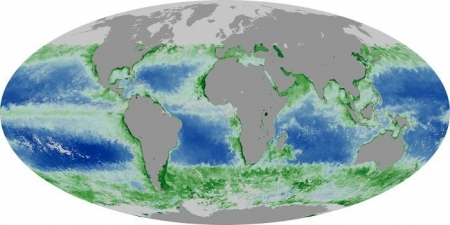

<font size = "1"><em>*Image: Monthly composition of the phytoplankton chlorophyll concentration during the month of December 2019. Modis Aqua Sensor data from the NASA space agency.</em></font>

*https://www.lavanguardia.com/natural/20231113/9368089/fitoplancton-mediterraneo-sufre-efecto-acidificacion-agua-absorcion-co2.html*


Currently, there are almost 1.5 billion cars circulating globally. According to the International Energy Agency, this figure will increase to 1.7 billion in 2035. Although the current percentage of electric and hybrid car cars in circulation does not exceed 3 percent of the world's total fleet, it is expected that the sale of these will increase gradually, given the change of policies and investments that are currently being carried out in many countries, especially China, one of the countries with highest rate of emissions in recent years due to the location of more and more factories, outsourcing of industries and high density of population.

*https://neomotor.epe.es/industria/las-ventas-mundiales-de-coches-electricos-alcanzaran-los-17-millones-de-unidades-en-2024-segun-la-aie-CB1773730*


The total production capacity of the entire car industry is around 90-100 million cars per year.To get an idea of the challenge of this transition to electric or hybrid transport that is so talked about in the media, if all car factories jointly agree to make only hybrid and electric cars only from now on, we can do the simple calculation of dividing the approximate total global fleet (1.5 billion) between total annual production (100 million/year) and we will see that it would still take 15 years to make this desired transition possible. The most realistic estimates are around 20 or 30 years.

Given the interest I have for this topic, it came to my attention the machine learning section on w3schools.com,  the example of multiple linear regression, which involves making a model  to predict CO$_2$ emissions according to the weight or volume of cars. Thanks to the platform Kaggle.com I found a larger dataset and thought it would be a good idea to replicate the Big Data and ML techniques that we learnt during a Big Data course using the example of w3schools.
 
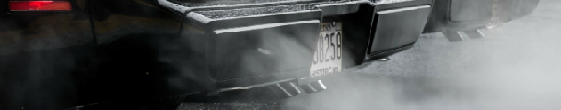

*https://www.w3schools.com/python/python_ml_multiple_regression.asp* 

*https://www.kaggle.com/datasets/ahmettyilmazz/fuel-consumption?select=Fuel_Consumption_2000-2022.csv*

---------------------------------------------------------------------------------------------------------------------------------

## Data description:

The chosen dataset comprises 24153 rows × 13 columns, 313.989 data in total, which were taken between 2000-2024 (we have added data from the years 2023 and 2024 to the Kaggle dataset, available on the original open data website from Canada Government). Here we have the variables of each column:
 
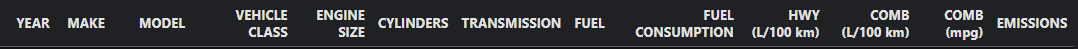

**Year**: Year when data is recorded

**Make**: vehicle brand.The options are:

ACURA, Alfa Romeo, Aston Martin, Audi, Bentley, BMW, Buick, Cadillac, Chevrolet, Chrysler,
Dodge, Fiat, Ford, GMC, Honda, Hyundai, Infiniti, Jaguar, Jeep, Kia, Lamborghini, Land Rover,
Lexus, Lincoln, Maserati, Mazda, Mercedes-Benz, Mini, Mitsubishi, Nissan, Porsche, Ram, Rolls-Royce, Sion, Smart, SRT, Subaru, Toyota, Volkswagen, Volvo, Genesis, Bugatti.


**Model:**

4wd/4x4 = Four-Wheel Drive,
AWD = All-Wheel Drive,
CNG = Natural Gas Compressed,
FFV = Flexible-Fuel Vehicle,
NGV = Natural Gas Vehicle,
'#' = High -performance engine that provides more power than the standard engine of the same size

**Class vehicle:** Vehicle class depending on their utility, capacity and weight.The options are:

Compact, SUV-SMALL, MID-SIZE, Two-Seater, Minicompact, Subcompact, Full size, Station Wagonsmall, SUV-Standard, Van-Cargo, Van-Passenger, Pickup Truck-Standard, Minivan, Special Purpose Vehicle, Station Wagon-Midsize, Pickup Truck-Small.


**ENGINE SIZE:** Numerical variable that measures the size of the engine in liters.

**Cylinders:** Number of cylinders in the car.

**Transmission:** Type of transmission with number of marches.
A = Automatic
AM = Manual Automated
AS = Automatic with Select Shift
AV = variable continuously
M = manual
3 - 10 = Number of Gears

**Fuel:** Fuel Type
X = regular gasoline
Z = Premium Gasoline
D = diesel
E = Ethanol (E85)
N = natural gas

**FUEL CONSUMPTION:**
Gasoline consumption on city in liters per 100 kilometers traveled (L/100km).

**HWY(L/100km):**
Consumption on freeway.

**COMB (L/100 km) and COMB (MPG):**
The COMB column means a combination of 55% consumption per city and 45% per highway on L/100km and MPG (Miles per Gallon).

**Emissions:**
Carbon dioxide emissions (CO$_2$) measured in grams per kilometer by combined driving of city and highway.

---------------------------------------------------------------------------------------------------------------------------------

## Data loading and preparation for analysis:

Once we know what we want to do with the project and the data we have available, the first step will be to load the data or dataset file in an easy format to use and consult. We will do the process known as ETL (extraction, transformation and load)

In [1]:
# we import the libraries we will need and create a context with pyspark.SparkContext
import findspark
findspark.init()
import pyspark
import random
import os.path
sc = pyspark.SparkContext(master="local[1]",appName='carbon_emissions_predictor')


'''
First of all, we will create a variable filename with the modified_csv route and archive,
then we make an RDD using 'sc.textFile' with the variable where we have the data, filename.
To visualize the first 5 rows, we use data.take(5).
'''

fileName = os.path.join('C:/Users/Joan Salas Dalmau/Downloads', 'car_emissions.csv')
data = sc.textFile(fileName) 
data.take(5)

['YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS',
 '2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186',
 '2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175',
 '2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230',
 '2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264']

Taking an initial examination of our data, we can make the following observations on the ETL process:
- The data comes from a .csv file. Values can be separated by a coma.
- There is a head row with the name of the columns.
- The type of data is not constant.There are categorical variables with objects or strings, alphanumeric and numerical, integers and floats.

To simplify things, since we want to do a similar model to the linear regression model used in the big data course task and the variable to be predicted is CO$_2$ measured in gr/km for a combined driving of city and highway, we will take only the numerical variables of the engine, cylinders and fuel consumption comb (L/100 km). I could include the other numerical variables of gasoline consumption by city and highway, but in the final analysis I want to challenge my own model and check if the prediction approaches the official emissions stated online of my parents' car. I know the size of the engine, number of cylinders and consumption of gasoline combined in L/100km, the family use of the car is very similar to the % of driving time on city and highway of the variable Fuel Consumption COMB. Secondly, in order to streamline the codes and facilitate the visualization of the Dataframe, we will abbreviate the names of each column as we had in task 5:

- Engine size (L) = ES
- Cylinders = CL
- Fuel Consumption Comb (L/100 km) = FC
- CO$_2$ emissions (g/km) = CE

Let's make the relevant changes and keep them in a new CSV file to continue the project.

In [2]:
# We import pandas library to manipulate csv file
import pandas as pd
'''
We create a variable with the original CSV file and
We read using pandas with pd.read_csv ()
'''
file = 'car_emissions.csv'
df = pd.read_csv(file)

# we make a list with the columns we want to rule out
columns_to_drop = ['YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS',
                   'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION',
                   'HWY (L/100 km)', 'COMB (mpg)']

# We delete columns with .drop()
df.drop(columns=columns_to_drop, inplace=True)

# We change the name of the columns with .rename()
df.rename(columns={
    'ENGINE SIZE': 'ES',
    'CYLINDERS': 'CL',
    'COMB (L/100 km)': 'FC',
    'EMISSIONS': 'CE'
}, inplace=True)

# Save the dataframe modified in a new csv file
modified_file = 'car_emissions_modified.csv'
df.to_csv(modified_file, index=False)

print(f'Modified file saved as "{modified_file}"')

Modified file saved as "car_emissions_modified.csv"


In [3]:
'''
Let's do the same load perfomed above with the modified file
and let's check if the changes have been done correctly.
'''
fileName = os.path.join('C:/Users/Joan Salas Dalmau/Downloads', 'car_emissions_modified.csv')
data = sc.textFile(fileName) 
data.take(5)

['ES,CL,FC,CE',
 '1.6,4,8.1,186',
 '1.6,4,7.6,175',
 '3.2,6,10.0,230',
 '3.5,6,11.5,264']

Now that we have all our data values numerical (integers and floats), we can continue with the process.

To use the spark csv package, we will use the sqlContext.read.format() method to specify the input data source format: 'csv'

We can specify different options on how to import the data with the options() method.

We will use the following options:

- delimiter = ',' because our data are delimited by coma
- header = 'true' because our dataset has a row that represents the header of the data
- inferschema = 'true' because all the data we use are real numbers, so the library can infer the type of each column automatically.

The last component needed to create a dataframe is to determine the location of the data with the load() method. Joining everything, we will use the following operation:

sqlContext.read.format().options().load()

In [4]:
#we create the new SQL context. We will call the variable 'carsDF'
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

'''
We add 'csv' to form as a csv file, in options we will write the delimiter options,
header and inferschema indicated in the statement and finally add the filename variable with the
location of the dataset.
'''
carsDF = sqlContext.read.format('csv')\
                              .options(delimiter=',', header='true', inferschema='true')\
                              .load(fileName)
type(carsDF)

C:\Users\Joan Salas Dalmau\anaconda3\lib\site-packages\pyspark\sql\context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


pyspark.sql.dataframe.DataFrame

We can now check the data type in each column with .dtypes () and with .show(5) we will see the appearance of the dataframe carsDF.

In [5]:
print(carsDF.dtypes)

[('ES', 'double'), ('CL', 'int'), ('FC', 'double'), ('CE', 'int')]


As we can see, we have 4 columns 'double' and 2 'int'.

Instead of using Spark CSV to infer (inferSchema()) the types of columns, we will specify the scheme as a DataType with a list of Structfield.

The full data type list is found in the pyspark.sql.types module.In this case we will use Doubletype() and Integertype().

For example, to specify the name of the column we will use: Structfield(name, type, True).The third parameter, True, means that we allow the column to have null values.

In [6]:
# we import all types of data with '*'
from pyspark.sql.types import *

'''
Add 4 times Structfield () with the names in each column of Dataframe Carsf followed
of Doubletype () or Integertype () to specify the type of data in the column and TRUE to allow null values.
'''
customSchema =  StructType([
    StructField('ES', DoubleType(), True),
    StructField('CL', IntegerType(), True),
    StructField('FC', DoubleType(), True),
    StructField('CE', IntegerType(), True)])

In [7]:
#We test to check that everything has been entered properly
assert set([f.name for f in customSchema.fields])==set(["ES", "CL", "FC", "CE"]), 'Incorrect column names in schema.'
assert set([f.dataType for f in customSchema.fields])==set([DoubleType(), IntegerType(), DoubleType(), IntegerType()]), 'Incorrect column types in schema.'

Then we will use the scheme we just created to read the data. To do this, we will modify the previous step sqlContext.read.format. We can specify the scheme doing:

Add Schema = customSchema to the load method (we add it using a comma just after the file name)
We eliminate the inferschema = 'true' option because we now specify the scheme that the data must follow.

In [8]:
'''
We put the same code as the previous sqlContext but without including
inferschema in options and adding Schema (Customschema).
'''
altcarsDF = sqlContext.read.format('csv') \
                                 .options(delimiter=',', header='true') \
                                 .schema(customSchema) \
                                 .load(fileName)

In [9]:
# TEST
expected = set([('ES', 'double'), ('CL', 'int'), ('FC', 'double'), ('CE', 'int')])
assert expected==set(altcarsDF.dtypes), "Incorrect schema for carsDF"

We check with '.dtypes' that altcarsDF follows the same type of data as carsDF. It should be noted that this time no Spark task was performed as we specified the scheme, so the Spark-CSV package does not have to read the data to infer the scheme.

In [10]:
print(altcarsDF.dtypes)

[('ES', 'double'), ('CL', 'int'), ('FC', 'double'), ('CE', 'int')]


In [11]:
#Visualize the first 4 rows of the new table with .show(5).
altcarsDF.show(5)

+---+---+----+---+
| ES| CL|  FC| CE|
+---+---+----+---+
|1.6|  4| 8.1|186|
|1.6|  4| 7.6|175|
|3.2|  6|10.0|230|
|3.5|  6|11.5|264|
|1.8|  4| 8.6|198|
+---+---+----+---+
only showing top 5 rows



---------------------------------------------------------------------------------------------------------------------------------

## Data analysis based on the type of project chosen:

Now that we have the data loaded, we will do a quick examination with basic analysis and visualizations. This is a step that must always be taken before trying to adjust a model to the data, so we can obtain more information about it. First we will record our DataFrame as a SQL table called 'cars'.

As we may repeat this practice several times, we try to eliminate any existing table in the first place with the same name. Once the previous step has been executed, we can record our databrame as a SQL table using sqlContext.registerDataFrameAsTable().

We create a table called 'cars' with the instructions mentioned.

In [12]:
'''
We add 'DROP TABLE IF EXISTS cars'.
Then we will write the last DataFrame created (altcarsDF) and 'cars'
to register as a table.
'''
sqlContext.sql('DROP TABLE IF EXISTS cars')
sqlContext.registerDataFrameAsTable(altcarsDF, "cars")

Now that our Dataframe exists as a SQL table, we can explore it using SQL and sqlContext.sql(...). We use the show() function to visualize the result of the DataFrame.

In [13]:
'''
To make exploration, we can make a simple query like 'SELECT * FROM cars' inside a
sqlContext.sql (). If we add cars.show(5) we will see the same table as altcarsDF
with all the columns and the first 20 rows.
'''
cars = sqlContext.sql("SELECT * FROM cars")
cars.show(5)

+---+---+----+---+
| ES| CL|  FC| CE|
+---+---+----+---+
|1.6|  4| 8.1|186|
|1.6|  4| 7.6|175|
|3.2|  6|10.0|230|
|3.5|  6|11.5|264|
|1.8|  4| 8.6|198|
+---+---+----+---+
only showing top 5 rows



We use the printschema order to describe the dataframe scheme.

In [14]:
cars.printSchema()

root
 |-- ES: double (nullable = true)
 |-- CL: integer (nullable = true)
 |-- FC: double (nullable = true)
 |-- CE: integer (nullable = true)



**Definition of scheme**

To remember, our scheme is as follows:

- ES = engine size in liters
- CL = number of cylinders
- FC = Fuel Consumption comb (55% consumption per city and 45% per highway in L/100km)
- CE = CO$_2$ emissions (g/km) for a combined driving by city and highway.

CE is our objective variable. This is the value we try to predict by using the other variables.

We can get the dataframe associated with a SQL table with the sqlContext.table() method. Then we will do a basic statistical analysis of all the columns. We will calculate and see the results in table format of:
- Number of records in our data
- average of each column
- maximum and minimum of each column
- standard deviation of each column

In [15]:
'''
We add 'cars' to sqlContext.table() and below I will write df.describe().show() to see
the table with the statistical analysis of all the columns.
'''
df = sqlContext.table('cars')
df.describe().show()

+-------+------------------+------------------+------------------+-----------------+
|summary|                ES|                CL|                FC|               CE|
+-------+------------------+------------------+------------------+-----------------+
|  count|             24153|             24153|             24153|            24153|
|   mean|3.3406326336272927| 5.836210822672132|11.035598062352527|250.6037759284561|
| stddev| 1.335185840786529|1.8284768730631218| 2.907717176404167|59.74717910813394|
|    min|               0.8|                 2|               3.6|               83|
|    max|               8.4|                16|              26.1|              608|
+-------+------------------+------------------+------------------+-----------------+



Here we can see that the average engine size is 3.35 liters, avg number of cylinders is between 5-6, the fuel consumption combined (city/highway) is 11.03 L/100km and the CO$_2$ emissions avg is 250.06 gr/km. To see how this value affects the overall emissions of cars globally, we could make a quick estimate with the number of cars in 2012 (dataset goes from 2000 to 2024) and the average distance that a car can drive for 1 year.

Obviously, this average varies between countries, but according to various sources, this average is around 13,000-15,000 km/year. It should also be considered that the number of cars increases every year and the car emissions decrease with the continuous improvements in efficiency and technology.

If we do the next calculation we will find the estimated annual global emissions of cars:

In [16]:
cars = 1100000000
avg_emissions = 250 #gr/km
avg_distance = 14000 #km/year
ton = 1000000  #gr
'''
CO2 annual emissions of cars =
cars * avg_emissions * avg_distance
''' 
emissions = int((cars * avg_emissions * avg_distance) / ton)
print(f'Estimated emissions: {emissions} tons')

Estimated emissions: 3850000000 tons


According to the calculation, cars emit approximately <font color = 'blue'> 3.85 gigatons of CO$_2$/Year </font>. If we double check this data online, in 2022 cars issued 3,56 gigatonelades.

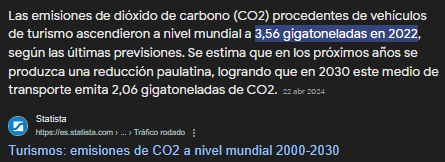

### **Visualize data**

To understand our data, we try to find correlations between the different characteristics and the corresponding labels. This can be important when we select a model. For example, if a label and its characteristics are correlated linearly, a linear regression model will achieve good performance; On the contrary, if the relationship is non-linear, more complex models, such as decision trees, can be a better option. We can use visualization tools to observe each of the possible predictors in relation to the label like a scatter graph to see the correlation between them.

We will see if there is a correlation between the variable that seems more obvious, fuel consumption comb (L/100km) and CO$_2$ emissions. We can use  SQL query to create a new table that contains only fuel consumption (FC) and CO$_2$ emissions (EC).

We will load a sample of random data of 1000 pairs of values for CE and FC. We can use a random arrangement or sample() on the result, collect() to make the plot, Matplotlib and Pandas libraries to make a scatter plot.

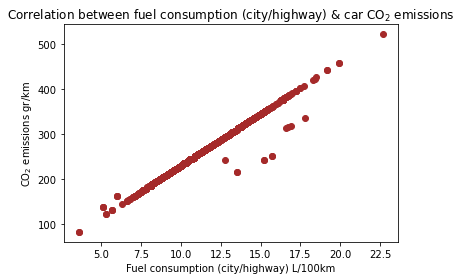

In [17]:
from matplotlib import pyplot as plt
import pandas as pd
from pyspark.sql.functions import rand 


'''
First we will make a SQL query by selecting the fuel consumption columns (FC) and
CO2 emissions (CE) of the 'cars' table. Add it to sqlContext.sql. In x_y_DF, add
the variable with the SQL x_y and the name of the columns we want to correlate to
The graph.
Then using Pandas Notation, we add to Pt.scatter x_y_DF['FC']
x_y_DF['CE'] to see the dispersion graph.
To improve the appearance we can include title and description of the x, y axis with plt.title(),
plt.xlabel and plt.ylabel).
'''

x_y=sqlContext.sql("SELECT FC, CE FROM cars").limit(1000).collect()
x_y_DF = pd.DataFrame(x_y, columns=['FC', 'CE']);

plt.scatter(x_y_DF['FC'], x_y_DF['CE'], color='brown')
plt.title('Correlation between fuel consumption (city/highway) & car CO$_2$ emissions')
plt.xlabel('Fuel consumption (city/highway) L/100km')
plt.ylabel('CO$_2$ emissions gr/km')
plt.show()

As expected, the correlation is completely linear. It is clear, the more fuel consumption, the more CO$_2$ emissions.

We repeat the same process for the rest of the variables, we will use a SQL sentence to create another scatter chart between the CO$_2$ emissions variables (EC) and the size of the engine in liters (ES).

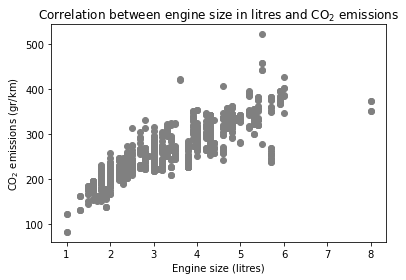

In [18]:
'''
We will do exactly the same as with the previous graph but using the engine size (s) in
Place of gasoline consumption. We will change the FC variable for ES in the query, 
columns of Dataframe and plt.scatter. 
We put the new variable in the title and the description of the x axis.
'''

x_y=sqlContext.sql("SELECT ES, CE FROM cars").limit(1000).collect()
x_y_DF = pd.DataFrame(x_y, columns=['ES', 'CE']);

plt.scatter(x_y_DF['ES'], x_y_DF['CE'], color='grey')
plt.title('Correlation between engine size in litres and CO$_2$ emissions')
plt.xlabel('Engine size (litres)')
plt.ylabel('CO$_2$ emissions (gr/km)')
plt.show()

As we can see, data seems to be more dispersed, but you can also see a correlation between the size of the engine and the emissions of the car. Finally, we will do the same process with the number of cylinders.

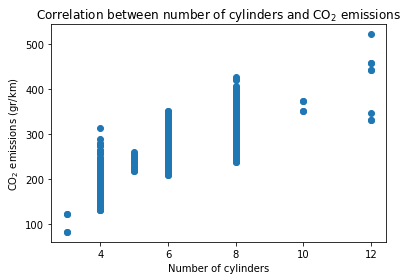

In [19]:
# same process we have done before, but with the cylinder variable (CL).
x_y= sqlContext.sql("SELECT CL, CE from cars").limit(1000).collect()
x_y_DF = pd.DataFrame(x_y, columns = ['CL', 'CE']);

plt.scatter(x_y_DF['CL'], x_y_DF['CE'])
plt.title('Correlation between number of cylinders and CO$_2$ emissions')
plt.xlabel('Number of cylinders')
plt.ylabel('CO$_2$ emissions (gr/km)')
plt.show()

In this case we see that the data is very grouped, but with an upward trend.

We can determine that of the 4 selected variables, fuel consumption combined between city and highway (LTRS/100km) has the strongest correlation with CO$_2$ emissions of the car.

---------------------------------------------------------------------------------------------------------------------------------

## Analysis of extracted information

### Preparation of data

The next step is to prepare the data to apply the regression. I made sure at the beginning of the project that the dataset is numerical and consistent to facilitate the following task.

The aim is to use the multiple linear regression method to determine a function that gives us car CO$_2$ emissions based on 3 independent or predictive variables: engine size, cylinders and gas consumption by city and highway.The first step in the construction of our regression is to convert the prediction characteristics of our Dataframe to a vector of characteristics using the pyspark.ml.feature.VectorAssembler() method.

VectorAssembler is a transformation that combines a given list of columns in a single vector. This transformation is very useful when we want to combine raw characteristics of data with others generated by applying different functions on the data in a single characteristics vector. To integrate in a single vector all this information before running a machine learning algorithm, VectorAssembler takes a list with the names of the entry columns (Strings list) and the name of the output column (string).

Next we turn the SQL 'cars' table into a dataset called Datasetdf, we establish the entrance columns of the vectorasember: ["ES", "CL", "FC"] and the output columns as "features".

In [20]:
from pyspark.ml.feature import VectorAssembler

# We add the dataset and columns as indicated in the statement above
datasetDF = sqlContext.table('cars')

vectorizer = VectorAssembler()
vectorizer.setInputCols(["ES", "CL", "FC"])
vectorizer.setOutputCol("features")

VectorAssembler_aaae209a34d3

In [21]:
# TEST
assert set(vectorizer.getInputCols())== {"ES", "CL", "FC"}, "Incorrect vectorizer input columns"
assert vectorizer.getOutputCol()=="features", "Incorrect vectorizer output column"

### **Model the data**

We will now shape our data to predict CO$_2$ emissions according to our 3 predictors. The Apache Spark MLlib API offers different implementations of regression techniques to model datasets. Here we will model our data based on a simple linear multiple regression as we saw very clear linear patterns in the dispersion graphs during the exploration of the data.

We need a way to evaluate the quality of the linear regression model that predicts CO$_2$ in a car based on the input parameters. We can do this through the division of our initial data established in a Training set used to train our model and a Test  set used to evaluate the performance of our model. We can use the randomSplit() method to divide our dataset, which takes a list of weights and an optional random (Random SEED).The seed is used to initialize the random numbers generator used by the division function.

Thus, we apply the randomSplit() method to divide datasetDF into trainingsetDF (80% of the DataFrame input) and testsetDF (20% of the DataFrame input). In order to always reproduce the same result, we will use the same seed used in task 5, 18009193. Finally, we apply the .cache() method to each date in memory to maximize performance.

In [22]:
#20% of the data to test and 80% to train
seed= 1800009193

(testSetDF, trainingSetDF) = datasetDF.randomSplit([0.2, 0.8] ,seed)

#we apply to both .cache() to improve performance
testSetDF.cache()
trainingSetDF.cache()

DataFrame[ES: double, CL: int, FC: double, CE: int]

Next we will create a linear multiple regression model and try to understand how to train it with lr.explainParams() method.

In [23]:
# ***** LINEAR REGRESSION MODEL ****

from pyspark.ml.regression import LinearRegression
from pyspark.ml.regression import LinearRegressionModel
from pyspark.ml import Pipeline

# Let's initialize our linear regression learner
lr = LinearRegression()

# We use explain params to dump the parameters we can use
print(lr.explainParams())

aggregationDepth: suggested depth for treeAggregate (>= 2). (default: 2)
elasticNetParam: the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty. (default: 0.0)
epsilon: The shape parameter to control the amount of robustness. Must be > 1.0. Only valid when loss is huber (default: 1.35)
featuresCol: features column name. (default: features)
fitIntercept: whether to fit an intercept term. (default: True)
labelCol: label column name. (default: label)
loss: The loss function to be optimized. Supported options: squaredError, huber. (default: squaredError)
maxBlockSizeInMB: maximum memory in MB for stacking input data into blocks. Data is stacked within partitions. If more than remaining data size in a partition then it is adjusted to the data size. Default 0.0 represents choosing optimal value, depends on specific algorithm. Must be >= 0. (default: 0.0)
maxIter: max number of iterations (>= 0). (default: 100)
predic

The next cell is based on Spark ML Pipeline API for Linear Regression.The first step is to establish the values of the following parameters:
- Define the name of the column where we will save the prediction as "Predicted_CE"
- Define the name of the column containing the label as "CE"
- Define the maximum number of iterations to 100
- Define the regularization parameter at 0.1

Now, we will create the ML Pipeline (execution flow) and establish the phases of the pipeline as a vector and then apply the linear stream we have defined. Finally, we will create the model by training it with Dataframe of TrainingsetDF.

In [24]:
# Now we set the parameters for the method
lr.setPredictionCol("Predicted_CE")\
  .setLabelCol("CE")\
  .setMaxIter(100)\
  .setRegParam(0.1)

# We will use the new spark.ml pipeline API. If you have worked with scikit-learn this will be very familiar.
lrPipeline = Pipeline()

lrPipeline.setStages([vectorizer, lr])

# Let's first train on the entire dataset to see what we get
lrModel = lrPipeline.fit(trainingSetDF)

According to Wikipedia, in statistics, linear regression is an approach to modeling the relationship between a scalar dependent variable 𝑦 and one or more explanatory variables (or independent variables) denoted 𝑋. In the case of linear regression, relationships are shaped by linear prediction functions and the parameters of the unknown model are estimated from the data. These models are called linear models.

Linear regression models have many practical uses. Most of which are classified in the following two categories:

- If the goal is the prediction or reduction of errors, linear regression can be used to adapt a predictive model to a set of observed data 𝑦 and 𝑋. After developing a model of this type, given a certain value 𝑋 of what we do not know its value of 𝑦, the adjusted model can be used to make a prediction of the possible value 𝑦.
- Given a variable 𝑦 and a number of variables 𝑋1, ..., 𝑋𝑝 that may be related to 𝑦, a linear regression analysis can be applied to quantify how strong it is the relationship between 𝑦 and each 𝑋𝑗, to evaluate that 𝑋𝑗may not have any relation to 𝑦, and thus identify that sub -basis of 𝑋𝑗 contains redundant information on 𝑦.


As we are interested in both uses, we would like to predict CO$_2$ emissions based on input variables and we would like to know which of the input variables are weakly or strongly correlated with CO$_2$ emissions.

Since a linear regression only calculates the line that minimizes the average quadratic error in the training date, given multiple dimensions of input we can express each predictor as a linear function in the form:

\\[ y = a + b x_1 + b x_2 + b x_i ... \\]

where 𝑎
is the intercept (value for point 0) and 𝑏
They are the coefficients.

To express the coefficients of this line we can recover the stage of the pipeline model estimator and express the weights and intercept of the function.

In [25]:
# The intercept is as follows:
intercept = lrModel.stages[1].intercept 

# The coefficents (i.e., weights) are as follows:
weights = lrModel.stages[1].coefficients 

# Create a list of the column names (without CE)
featuresNoLabel = [col for col in datasetDF.columns if col != "CE"]

# Merge the weights and labels
coefficents = zip(weights, featuresNoLabel)

equation = "y = {intercept}".format(intercept=intercept)
variables = []
for x in coefficents:
    weight = abs(x[0])
    name = x[1]
    symbol = "+" if (x[0] > 0) else "-"
    equation += (" {} ({} * {})".format(symbol, weight, name))

# Finally here is our equation
print("Linear Regression Equation: " + equation)

Linear Regression Equation: y = 40.25298265795863 + (2.9341875674139097 * ES) + (5.289381215346854 * CL) + (15.373337238047004 * FC)


Finally, we get the equation that predicts CO$_2$ (gr/km) emissions based on the predictors of the engine size (L), cylinder number and fuel consumption combined between city and highway (L/100km).

We will now study the behavior of our predictions in this model. We apply our linear regression model for 20% of the data we have separated from the input data set. Model's output will be a theoritical CO$_2$ emission column called "Predicted_CE".

In [26]:
# Apply our LR model to the test data and predict carbon emissions
predictionsAndLabelsDF = lrModel.transform(testSetDF).select("ES", "CL", "FC", "CE", "Predicted_CE")
predictionsAndLabelsDF.show()

+---+---+----+---+------------------+
| ES| CL|  FC| CE|      Predicted_CE|
+---+---+----+---+------------------+
|0.8|  3| 4.2|113|123.03649275772773|
|0.9|  3| 6.9|157|164.83792205719604|
|1.0|  3| 5.4|124|142.07133495686693|
|1.0|  3| 6.5|150| 158.9820059187186|
|1.0|  3| 8.4|195|188.19134667100792|
|1.0|  4| 5.5|126|148.89804989601848|
|1.2|  3| 5.3|122|141.12083874654502|
|1.2|  3| 6.2|143| 154.9568422607873|
|1.2|  3| 6.5|150|159.56884343220142|
|1.2|  3| 6.5|151|159.56884343220142|
|1.2|  3| 7.8|184| 179.5541818416625|
|1.2|  3| 8.0|188| 182.6288492892719|
|1.2|  4| 5.9|136|155.63422230472005|
|1.3|  2|11.0|253|223.75289854480746|
|1.3|  2|11.2|258|226.82756599241685|
|1.3|  2|11.2|258|226.82756599241685|
|1.3|  2|11.3|260|228.36489971622157|
|1.3|  3| 7.7|181|178.31026687459922|
|1.3|  3| 7.9|185| 181.3849343222086|
|1.3|  3| 8.4|197| 189.0716029412321|
+---+---+----+---+------------------+
only showing top 20 rows



If we look at the real values and the predicted ones in each row, the difference is slightly bigger than the model we created on task 5. It does not seem to be completely tight. However, we will evaluate or measure in a more scientific way the quality of this model and see if this difference is reasonable.

First we will use an evaluation metric like **Root Mean Square Error (RMSE)** to validate our model.

RSME is defined as: \\( RMSE = \sqrt{\frac{\sum_{i = 1}^{n} (x_i - y_i)^2}{n}}\\) where \\(y_i\\) It is the observed value \\(x_i\\) is the predicted value.

RMSE is a very common measure for calculating the differences between the values predicted by a model or estimator and the values that are really observed. The lower the RMSE, the better our model.

Spark ML Pipeline provides different metrics for evaluating regression models, including [regressionionvaluator () (https://spark.apache.org/docs/last/apython/pyspark.ml.).

After creating an instance of [regressionvaluator] (https://spark.apache.org/docs/last/api/python/pyspark.ml.html#pyspark.ml.evaluation.regressionEValuator), we will set the name of the target column"CE" and the name of the prediction column in "Predicted_CE". Then we invoke the evaluator to the predictions.

In [27]:
# Now let's compute an evaluation metric for our test dataset
from pyspark.ml.evaluation import RegressionEvaluator

# Create an RMSE evaluator using the label and predicted columns
#We include 'Predicted_CE' to predictionCol, 'CE' to labelCol & 'rmse' to metricName
regEval = RegressionEvaluator(predictionCol= 'Predicted_CE', labelCol='CE', metricName='rmse')

# Run the evaluator on the DataFrame
rmse = regEval.evaluate(predictionsAndLabelsDF)

print("Root Mean Squared Error: %.2f" % rmse)

Root Mean Squared Error: 21.48


Another very useful statistical evaluation measure is the determination coefficient, which is denoted \\(R ^ 2 \\) or \\(r ^ 2 \\) and pronounced "r squared". It is a number that indicates the proportion of variation in the dependent variable that is predictable from the independent variables and provides a measure of how the results observed are replicated by the model, based on the proportion of the total variation of the results explained by the model. The determination coefficient goes from 0 to 1 (closer to 1), and the greater the value, the better our model.


To calculate \\(r ^ 2 \\), we must execute the evaluator `regeval.metricname:" r2 "`

In [28]:
# Now let's compute another evaluation metric for our test dataset
r2 = regEval.evaluate(predictionsAndLabelsDF, {regEval.metricName: "r2"})
print("r2: {0:.2f}".format(r2))

r2: 0.87


Once we have the RMSE and the coefficient of determination, we put these values into context. The lower the RMSE, the better adjusted is the model. In our case, we have gained a much higher value than the model created at task 5. However, if we look at the standard deviation of the emissions column (59.74). Std deviation measures the level of dispersion data values of that column have with respect to its mean value. If the RMSE is below half of CE std deviation, we can consider the model is acceptable. In terms of the R$^2$ determination coefficient, if we get 0.87, it means that 87% of the variability in the dependent variable (carbon emissions) is explained by the regression model with the independent variables included. In other words, the model is able to capture and explain 87% of the changes in the dependent variable. Thus, we consider the model predicts reasonably well. We could modify parameters or try a different model to try to improve these metrics but we will continue evaluating  this model for the moment.

Generally, assuming a Gaussian distribution of errors, a good model will have 68% of the predictions within 1 RMSE and 95% within 2 RMSE of the actual value. We will examine the predictions and see if a RMSE as the obtained complies with this criterion.

We will create a new DataFrame using selectExpr() to generate a set of SQL expressions, and record the Dataframe as a SQL table using registerTempTable().

In [29]:
# First We Remove the Table IF It Already Exists
# We use the sqlContext.sql() to remove the table we want to create.
sqlContext.sql('DROP TABLE IF EXISTS cars_RMSE_Evaluation')

# Next we calculate the residual error and divide it by the RMSE
predictionsAndLabelsDF.selectExpr("CE", "Predicted_CE", "CE - Predicted_CE Residual_Error", "(CE - Predicted_CE) / {} Within_RSME".format(rmse)).registerTempTable("cars_RMSE_Evaluation")

C:\Users\Joan Salas Dalmau\anaconda3\lib\site-packages\pyspark\sql\dataframe.py:329: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


We can use SQL sentences to explore the cars_RMSE_Evaluation table. First we will see what data on the table using a SQL SELECT query.

We complete the following query to return the elements of the cars_RMSE_Evaluation table and visualize some on screen with the show() action.

In [30]:
'''
We use the query select * from ... to see the columns of the table created,
followed by .Show ()
'''
sqlContext.sql('SELECT * FROM cars_RMSE_Evaluation').show()

+---+------------------+-------------------+--------------------+
| CE|      Predicted_CE|     Residual_Error|         Within_RSME|
+---+------------------+-------------------+--------------------+
|113|123.03649275772773|-10.036492757727729|-0.46733483811518345|
|157|164.83792205719604| -7.837922057196039|-0.36496155820356796|
|124|142.07133495686693|-18.071334956866934| -0.8414656992693036|
|150| 158.9820059187186| -8.982005918718613| -0.4182341763502975|
|195|188.19134667100792|  6.808653328992079|  0.3170351414678157|
|126|148.89804989601848|-22.898049896018478|  -1.066214732538891|
|122|141.12083874654502| -19.12083874654502| -0.8903343325149995|
|143| 154.9568422607873|-11.956842260787312| -0.5567531484553093|
|150|159.56884343220142| -9.568843432201419|-0.44555942043541297|
|151|159.56884343220142| -8.568843432201419|-0.39899585989726055|
|184| 179.5541818416625|  4.445818158337488| 0.20701312295736493|
|188| 182.6288492892719|  5.371150710728102|  0.2500999012785284|
|136|155.6

Next we will visualize RMSE using a histogram.
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

We can play with the different parameters of the histogram such as the number of 'bins' or the density parameter, which changes between the 'count' of elements in each bin or the normalization so that the area of the histogram is 1. We take a random sample of 2000 elements and use .collect() to make the plot.

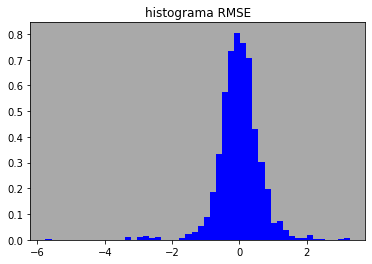

In [31]:
import numpy as np

'''
We make the query SELECT Within_RSME From ... to take the data we want to visualize
In the histogram.Add the df_x variable pd.Dataframe (..).tonumpy(), 
put 50 bins and add density = True.
'''
df_x=sqlContext.sql("SELECT Within_RSME FROM cars_RMSE_Evaluation").limit(2000).collect()

x = pd.DataFrame(df_x).to_numpy()

num_bins= 50

plt.hist(x, num_bins, density = True, color = 'blue')
plt.gca().set_facecolor('darkgrey')
plt.title('histograma RMSE')
plt.show()

Note that the histogram should clearly show that the RMSE focuses on 0 with the vast majority of errors within 2 RMSE. Using a SQL select instruction, we can count the number of predictions within + or - 1.0 and + or - 2.0. We will see how many predictions are within each of the intervals (+-1 RSME, +-2 RSME and beyond).

In [32]:
df_y = sqlContext.sql("""
    SELECT 
        CASE 
            WHEN Within_RSME <= 1.0 AND Within_RSME >= -1.0 THEN 1 
            WHEN Within_RSME <= 2.0 AND Within_RSME >= -2.0 THEN 2 
            ELSE 3 
        END AS RSME_Multiple, 
        COUNT(*) AS count 
    FROM cars_RMSE_Evaluation 
    GROUP BY 
        CASE 
            WHEN Within_RSME <= 1.0 AND Within_RSME >= -1.0 THEN 1 
            WHEN Within_RSME <= 2.0 AND Within_RSME >= -2.0 THEN 2 
            ELSE 3 
        END 
    ORDER BY RSME_Multiple""")

# We see the results with .show()
df_y.show()

+-------------+-----+
|RSME_Multiple|count|
+-------------+-----+
|            1| 4063|
|            2|  408|
|            3|  257|
+-------------+-----+



We can also add a bar graph to make it clearer where most predictions are found so that we can visually determine whether we have a tight or not model.

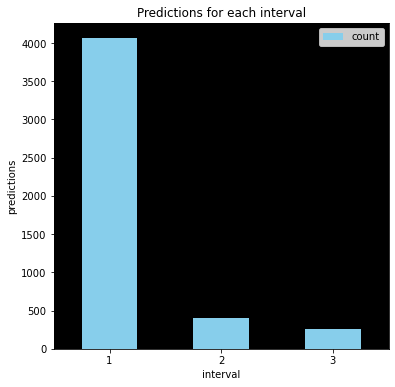

In [33]:
df_y_pd = df_y.toPandas()
df_y_pd.plot.bar(x='RSME_Multiple', y='count', figsize=(6, 6), color='skyblue', width=0.5)
plt.gca().set_facecolor('black')
plt.title('Predictions for each interval')
plt.xlabel('interval')
plt.ylabel('predictions')
plt.xticks(rotation=0)
plt.show()

Given that most predictions are at 1 RMSE of the real values, it is fulfilling the criterion (68% to 1 RMSE and 95% to 2 RMSE) of what is considered an acceptable model that is in accordance with the values ​​observed.

---------------------------------------------------------------------------------------------------------------------------------

## Conclusions

The aim of the project was to create a ML model that could predict the CO$_2$ (gr/km) emissions of a car based on the engine size, the number of cylinders and the consumption of gasoline combined with highway and city in liters/100km. We have been able to create this model, quality metrics are improvable, but the analsis of residual errors gives us an acceptable result.

In this last section, I want to put the model to test with real data of our family car, a Mazda 2 2024 hybrid that only has 1 month in use, to see if the prediction is close or far from the official data I found online about our car.

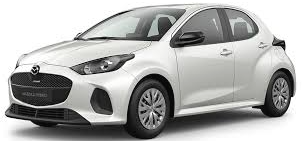

Here we have the data of engine size, cylinders, emissions and the average consumption that the car carries in a month of use:

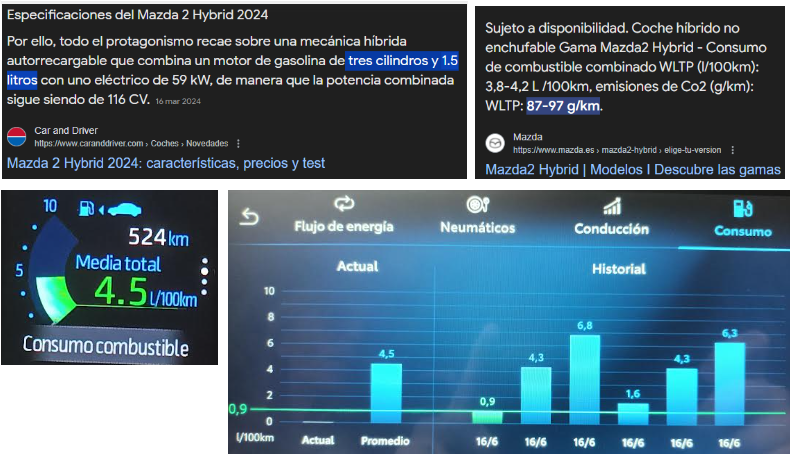

As we can see, with a size of 1.5 liter engine, 3 cylinders and a combined fuel consumption (city/highway) of 3.8-4.2 L/100km, the cars' emissions are 87-97 gr/km. Our average consumption is 4.5 L/100km, so the model should give an approximate prediction of **103 gr/km**. We take the data and implement it to the model to see what prediction it gives us.

In [34]:
from pyspark.sql import SparkSession

# We define the data of the Mazda 2 Hybrid 2024 and we implement them to the model to make the prediction
mazda_data = sqlContext.createDataFrame([(1.5, 3, 4.5)], ['ES', 'CL', 'FC'])
predictionsAndLabelsDF = lrModel.transform(mazda_data).select("ES", "CL", "FC", "Predicted_CE")
predictionsAndLabelsDF.show()

+---+---+---+------------------+
| ES| CL| FC|      Predicted_CE|
+---+---+---+------------------+
|1.5|  3|4.5|129.70242522633157|
+---+---+---+------------------+



For a 1.5 liter gasoline engine, 3 cylinders and 4.5 L/100km in average fuel consumption combined between highway and city, the model predicts that the car will emit **129.70 gr/km**. If we subtract the model's RMSE (21.48) to our prediction, we get 108.22gr/km. Recall that when observing the table with real and predicted values, we already noticed that there was a systematic bias in many rows. Nevertheless, I consider we should obtain a figure closer to **103gr/km**.

Despite following the process of task 5 reasonably, I am not satisfied with the prediction of the model. Therefore, I decided to give a try with another type of model used for regression problems, BOOSTED GRADIENT TREES.

https://spark.apache.org/docs/3.1.1.1/api/python/reference/api/pyspark.ml.regression.gltregressor.html

The GBT model (BOOSTED TREES) is a very powerful supervised ML model used for both regression and classification tasks. It consists of a set of decision-making trees that train sequentially, where each tree is concentrated in the errors of the previous trees, gradually improving the prediction. It is robust and effective for managing complex and non-linear data too.

Within the model, we will apply 'Crossvalidator', a cross-validation tool in Spark that allows to adjust the hyperparameters of the model to improve their generalization and reduce overfitting. It is configured to test different combinations of hyperparameters (Maxdepth and Maxbins) of the GBTRegressor, using a grid of parameters defined by ParamGridBuilder. Finally, the model quality metrics (RMSE and R2) are calculated and displayed using the test data, as well as the real predictions and labels. This process helps to ensure that the model is optimized to obtain the best possible predictions in new data, using cross-validation to prevent overfitting and improve the generalization of the model.

We will also use 'Standardscaler', a data pre-processing technique used to transform predictive variables so that they have a mean value = 0 and a standard deviation of 1. This process is called data standardization. It improves the convergence of the model. This is particularly important for gradient-based models like GBTs. It also avoids the impact of the scale of variables, very different scale features can negatively affect the accuracy of the model. Normalization ensures that all characteristics are of the same importance during the training process. One last point in favor, the improvement of the interpretation. Interpretations of coefficients and weights in some models can be easier when the characteristics are standardized, as all units of measure are converted to the same scale.

We make the new model then:

In [35]:
from pyspark.ml.feature import StandardScaler
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# We define first of all the columns of entry and exit
input_columns = ['ES', 'CL', 'FC']
output_column = 'CE'

# Create Standardscaler, GBTregressor Model and implement Pipeline together with Vectorizer
scaler = StandardScaler(inputCol='features', outputCol='scaled_features', withStd=True, withMean=True)
gbt = GBTRegressor(labelCol=output_column, featuresCol='scaled_features', seed=42)
pipeline = Pipeline(stages=[vectorizer, scaler, gbt])

'''
We define the search parameters to try different options.
Maxdepth is the maximum depth of the decision trees in the model,
Controlling the complexity and ability to generalize.
Maxbins specifies the maximum number of categories for each feature,
affecting the accuracy and performance of divisions in the trees.
'''
param_grid = ParamGridBuilder() \
    .addGrid(gbt.maxDepth, [3, 5, 7]) \
    .addGrid(gbt.maxBins, [32, 64]) \
    .build()

# We define RMSE evaluator
evaluator = RegressionEvaluator(labelCol=output_column, predictionCol='prediction', metricName='rmse')

'''
Set the cross-validator with the pipeline and 'param_grid' parameters 
created previously.numfolds = 3 indicates that the data is divided 
into 3 parts for cross validation, training and evaluating the model
in 3 different data sets for a better estimate of your performance.
'''

cv = CrossValidator(estimator=pipeline, estimatorParamMaps=param_grid, 
                    evaluator=evaluator, numFolds=3)

# We train the model using crossvalidator
cv_model = cv.fit(trainingSetDF)

#We get the best model and the best RMSE and R2 metrics
best_model = cv_model.bestModel
best_rmse = evaluator.evaluate(best_model.transform(testSetDF))
best_r2 = evaluator.evaluate(best_model.transform(testSetDF), {evaluator.metricName: 'r2'})

#we see the model predictions
predictionsAndLabelsDF = best_model.transform(testSetDF).select("ES", "CL", "FC", "CE", "prediction")
predictionsAndLabelsDF.show()

# We see the RMSE and R2 values
print("Best rmse: {0:.2f}".format(best_rmse))
print("Best r2: {0:.2f}".format(best_r2))

+---+---+----+---+------------------+
| ES| CL|  FC| CE|        prediction|
+---+---+----+---+------------------+
|0.8|  3| 4.2|113|112.82339537176537|
|0.9|  3| 6.9|157|156.83935281857384|
|1.0|  3| 5.4|124| 110.3246454277619|
|1.0|  3| 6.5|150|148.80529349256835|
|1.0|  3| 8.4|195|196.45959534443423|
|1.0|  4| 5.5|126|  108.754544006247|
|1.2|  3| 5.3|122|133.52594412906055|
|1.2|  3| 6.2|143|148.80529349256835|
|1.2|  3| 6.5|150|148.80529349256835|
|1.2|  3| 6.5|151|148.80529349256835|
|1.2|  3| 7.8|184|181.61930190169713|
|1.2|  3| 8.0|188|185.59911748867117|
|1.2|  4| 5.9|136|131.95584270754566|
|1.3|  2|11.0|253|255.03429128345445|
|1.3|  2|11.2|258| 257.6575055691688|
|1.3|  2|11.2|258| 257.6575055691688|
|1.3|  2|11.3|260| 252.3649725519925|
|1.3|  3| 7.7|181| 177.5761351312823|
|1.3|  3| 7.9|185|185.59911748867117|
|1.3|  3| 8.4|197|196.81708168256344|
+---+---+----+---+------------------+
only showing top 20 rows

Best rmse: 11.74
Best r2: 0.96


If we look at the table, the predictions are much closer to the actual value than the previous model. RMSE and R2 metrics also improve considerably. We try this new model with our car data:

In [36]:
# We define the data of the Mazda 2 Hybrid 2024 and we implement them to the model to make the prediction
mazda_data = sqlContext.createDataFrame([(1.5, 3, 4.5)], ['ES', 'CL', 'FC'])
predictionsAndLabelsDF = best_model.transform(mazda_data).select("ES", "CL", "FC", "prediction")
predictionsAndLabelsDF.show()

+---+---+---+------------------+
| ES| CL| FC|        prediction|
+---+---+---+------------------+
|1.5|  3|4.5|114.36413596262656|
+---+---+---+------------------+



Indeed, the prediction improves, **114gr/km**. If we subtract the new RMSE value to our prediction, we are obtaining the exact approximate value we were expecting (103 gr/km) when comparing with official data (114.36 - 11.74 = **102.62 gr/km**). We could analyze residual errors too like done before and see if most predictions are at 1 RMSE, but it is understood that if the other model was already considered adjusted with more than 95% of predictions at 1 or 2 RMSEs away, this will get even better results.

So, if we have to choose between the multiple linear regression model or the Gradient Boosted Trees model to predict CO$_2$ emissions in any car, we select the GBT model.

To conclude, apart from putting into practice the knowledge gained throughout this Big Data course and creating a model that works, the intention of the project was also being able to offer anyone the opportunity to make a quick and approximate estimate of its cars' carbon footprint according to easily accessible data such as the size of the engine (L) the number of cylinders and the average fuel consumption (L/100km). If it helps spreading awareness and modifying behaviors to reduce carbon emissions globally, the better.

In our case, it is good to know that switching from a Mazda 2 gasoline to the hybrid model will significantly reduce our carbon footprint whille driving. I leave one last code that allows any user to enter data from their car to know their emissions:

In [41]:
# We define a function to collect user data
def collect_user_data():
    ES = float(input("Introduce your car engine size in liters: "))
    CL = int(input("Introduce number of cylinders: "))
    FC = float(input("Introduce average fuel consumption in L/100km "))
    return ES, CL, FC

# We collect our values in our 3 independent variables ES, CL and FC.
ES, CL, FC = collect_user_data()
# We create a DataFrame with them using sqlContext
car_data = sqlContext.createDataFrame([(ES, CL, FC)], ['ES', 'CL', 'FC'])

# We transform our data with the model
predictionsAndLabelsDF = best_model.transform(car_data).select("ES", "CL", "FC", "prediction")

# Show predictions.
print('CO2 emissions prediction according to introduced data:')
predictionsAndLabelsDF.show()

Introduce your car engine size in liters: 2
Introduce number of cylinders: 4
Introduce average fuel consumption in L/100km 4.7
CO2 emissions prediction according to introduced data:
+---+---+---+-----------------+
| ES| CL| FC|       prediction|
+---+---+---+-----------------+
|2.0|  4|4.7|128.3692801966008|
+---+---+---+-----------------+

